In [1]:
%matplotlib inline 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


- There are no missing values
- There is only one catagorical feature

In [4]:
df.shape

(150, 6)

In [5]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Data Visualization

there are three types of species we have to predict , exist with freq of 50

lets analyse all of them

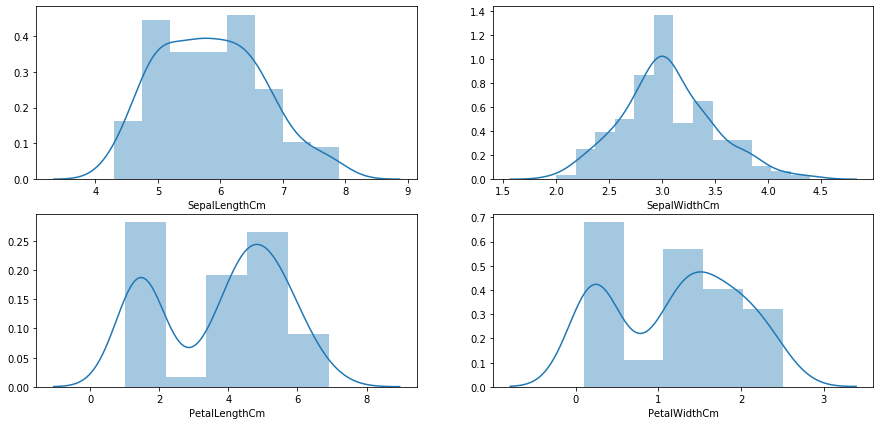

In [7]:
fig , ax = plt.subplots(2,2,figsize=(15,7))

sns.distplot(df.SepalLengthCm,ax=ax[0,0])

sns.distplot(df.SepalWidthCm,ax=ax[0,1])

sns.distplot(df.PetalLengthCm,ax=ax[1,0])
sns.distplot(df.PetalWidthCm,ax=ax[1,1])


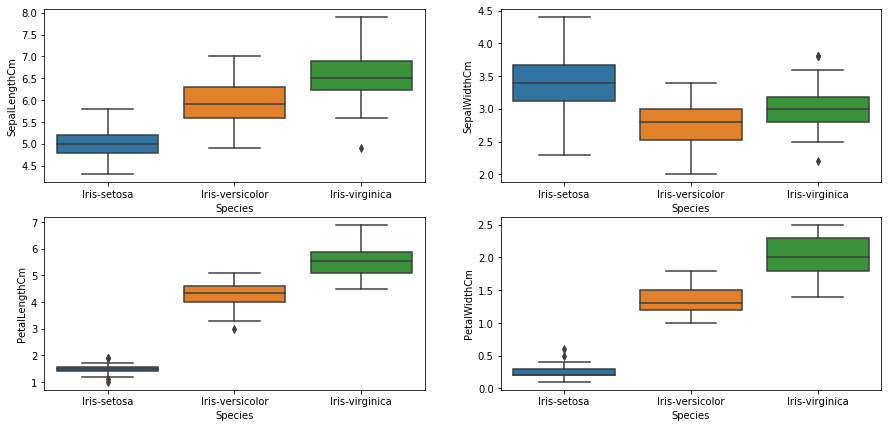

In [8]:
fig , ax = plt.subplots(2,2,figsize=(15,7))
sns.boxplot(x=df.Species,y=df.SepalLengthCm,data=df,ax=ax[0,0])
sns.boxplot(x=df.Species,y=df.SepalWidthCm,data=df,ax=ax[0,1])
sns.boxplot(x=df.Species,y=df.PetalLengthCm,data=df,ax=ax[1,0])
sns.boxplot(x=df.Species,y=df.PetalWidthCm,data=df,ax=ax[1,1])

### Analysis Results
- Iris-viginica has a high sepelLength , PetalLength , PetalWidth
- Iris-setosa has a very low PetalLength , PetalWidth and SepalLenght but a very high SepalWidth
- Iris-versicolor is a clearly a catagory that exis between  both 


### Feature Selection
- since all other features have a significant affect on our target variable we consider all of them

In [9]:
x = df.drop(['Id','Species'],axis=1)

y = df['Species']

x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Machine Learning

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


### KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

model.fit(x_train,y_train)

prediction = model.predict(x_test)

print('accuracy score',accuracy_score(y_test,prediction))

accuracy score 1.0


- What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?
- Thats what we call cross validation
- lets do it

In [12]:
#from sklearn.cross_validation import cross_val_score

from sklearn.model_selection import cross_val_score

# lets do it for 10 fold

scores = cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('Accuracy score after cross validation is ',scores.mean())

Accuracy score after cross validation is  0.9666666666666668


### DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x,y)

predict = model.predict(x_test)

print('accuracy score',accuracy_score(y_test,predict))

print('Accuracy score after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

accuracy score 1.0
Accuracy score after 10 fold cross validation 0.9533333333333334


### SVM

In [14]:
from sklearn.svm import SVC

model = SVC()

model.fit(x,y)

predict = model.predict(x_test)

print('accuracy acore',accuracy_score(y_test,predict))

print('Accuracy score after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

accuracy acore 0.9666666666666667
Accuracy score after 10 fold cross validation 0.9800000000000001


### Lets predict by our svm model

In [21]:
X_new = np.array([[5.1,3.5,1.4,0.2], [  7.0 ,3.2 ,4.7 ,1.4 ]])

prediction = model.predict(X_new)

print('Prediction by our SVM model ',prediction)

Prediction by our SVM model  ['Iris-setosa' 'Iris-versicolor']
